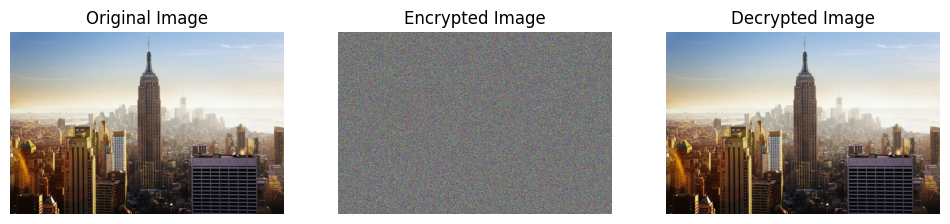

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# ... (rest of your code)

# Example usage
# Replace with the actual path to your image
image_path = '/content/New-York.jpg'
encrypted_image_path = 'encrypted_image.jpg'
decrypted_image_path = 'decrypted_image.jpg'
key = 123  # Encryption key

# Load the original image
image_array = load_image(image_path)

# ... (rest of your code)

def encrypt_image(image_array, key):
    """Encrypt the image by swapping pixel values and adding a key."""
    # Flatten the image to a 1D array
    flat_image = image_array.flatten()

    # Generate a pseudo-random permutation based on the key
    np.random.seed(key)
    permutation = np.random.permutation(len(flat_image))

    # Apply the permutation to the flat image
    encrypted_flat_image = flat_image[permutation]

    # Add the key value to each pixel
    encrypted_flat_image = (encrypted_flat_image + key) % 256

    # Reshape back to the original image shape
    encrypted_image = encrypted_flat_image.reshape(image_array.shape)
    return encrypted_image

def decrypt_image(encrypted_image_array, key):
    """Decrypt the image by reversing the encryption process."""
    # Flatten the encrypted image to a 1D array
    flat_encrypted_image = encrypted_image_array.flatten()

    # Generate the same pseudo-random permutation based on the key
    np.random.seed(key)
    permutation = np.random.permutation(len(flat_encrypted_image))

    # Reverse the permutation
    inverse_permutation = np.argsort(permutation)

    # Subtract the key value from each pixel
    decrypted_flat_image = (flat_encrypted_image - key) % 256

    # Apply the inverse permutation
    decrypted_flat_image = decrypted_flat_image[inverse_permutation]

    # Reshape back to the original image shape
    decrypted_image = decrypted_flat_image.reshape(encrypted_image_array.shape)
    return decrypted_image

# Example usage
# Replace with your image path
image_path = '/content/New-York.jpg'
encrypted_image_path = 'encrypted_image.jpg'
decrypted_image_path = 'decrypted_image.jpg'
key = 123  # Encryption key

# Load the original image
image_array = load_image(image_path)

# Encrypt the image
encrypted_image = encrypt_image(image_array, key)

def save_image(image_array, save_path):
    """Save a numpy array as an image file."""
    # Convert the image array to uint8 (unsigned 8-bit integer)
    image_array = image_array.astype(np.uint8)  # Change the datatype to uint8
    image = Image.fromarray(image_array)
    image.save(save_path)
# Decrypt the image
decrypted_image = decrypt_image(encrypted_image, key)

# Save the decrypted image
save_image(decrypted_image, decrypted_image_path)

# Display the original, encrypted, and decrypted images
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image_array)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Encrypted Image")
plt.imshow(encrypted_image)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Decrypted Image")
plt.imshow(decrypted_image)
plt.axis('off')

plt.show()